<a href="https://colab.research.google.com/github/KaidNassima/Machine_learning_labs/blob/main/TP2_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd './drive/My Drive/INTTIC/TP_Machine_Learning/TP_2_Logistic_Regression '

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/INTTIC/TP_Machine_Learning/TP_2_Logistic_Regression 


# **Import Necessary Packages** 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import  recall_score, precision_score, f1_score,  confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


# **Loading Data**

In [ ]:
data = pd.read_csv("./Algerian_forest_fires_dataset_UPDATE.csv",header= 1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# **Data Exploration**




In [ ]:
df = data.copy()
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# **Data Cleaning**

In [ ]:
#counting for each column how many null values there are
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [ ]:
#the missing values in order to find the separation row 
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [ ]:
#dropping the index column 
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [ ]:
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1
df[['Region']] = df[['Region']].astype(int)

In [ ]:
#remove space from headers 
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
#dropping rows with null values 
df =df.dropna().reset_index(drop=True) 
df = df.drop(122).reset_index(drop=True)

In [ ]:
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [ ]:
df.shape

(243, 15)

In [ ]:
#converting to int
df[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)
#converting to float 
objects = [features for features in df.columns if df[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [ ]:
#droping year column 
df = df.drop(['year'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   Temperature  243 non-null    int64  
 3   RH           243 non-null    int64  
 4   Ws           243 non-null    int64  
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DMC          243 non-null    float64
 8   DC           243 non-null    float64
 9   ISI          243 non-null    float64
 10  BUI          243 non-null    float64
 11  FWI          243 non-null    float64
 12  Classes      243 non-null    object 
 13  Region       243 non-null    int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 26.7+ KB


# **Exploratory Data** 

In [ ]:
#Encoding not fire and fire to 0 and 1 
df['Classes']= np.where(df['Classes']== 'not fire',0,1)

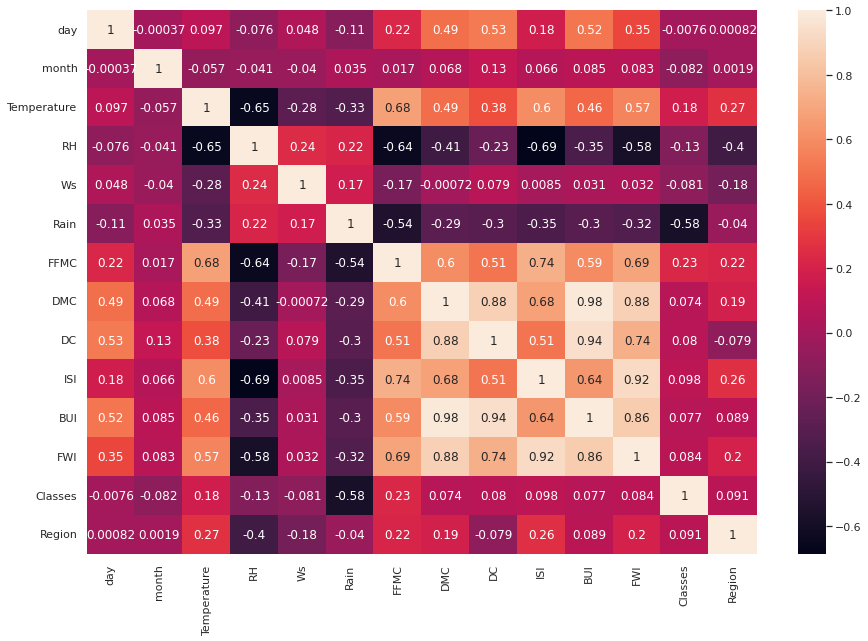

In [ ]:
#correlation matrix 
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot=True)

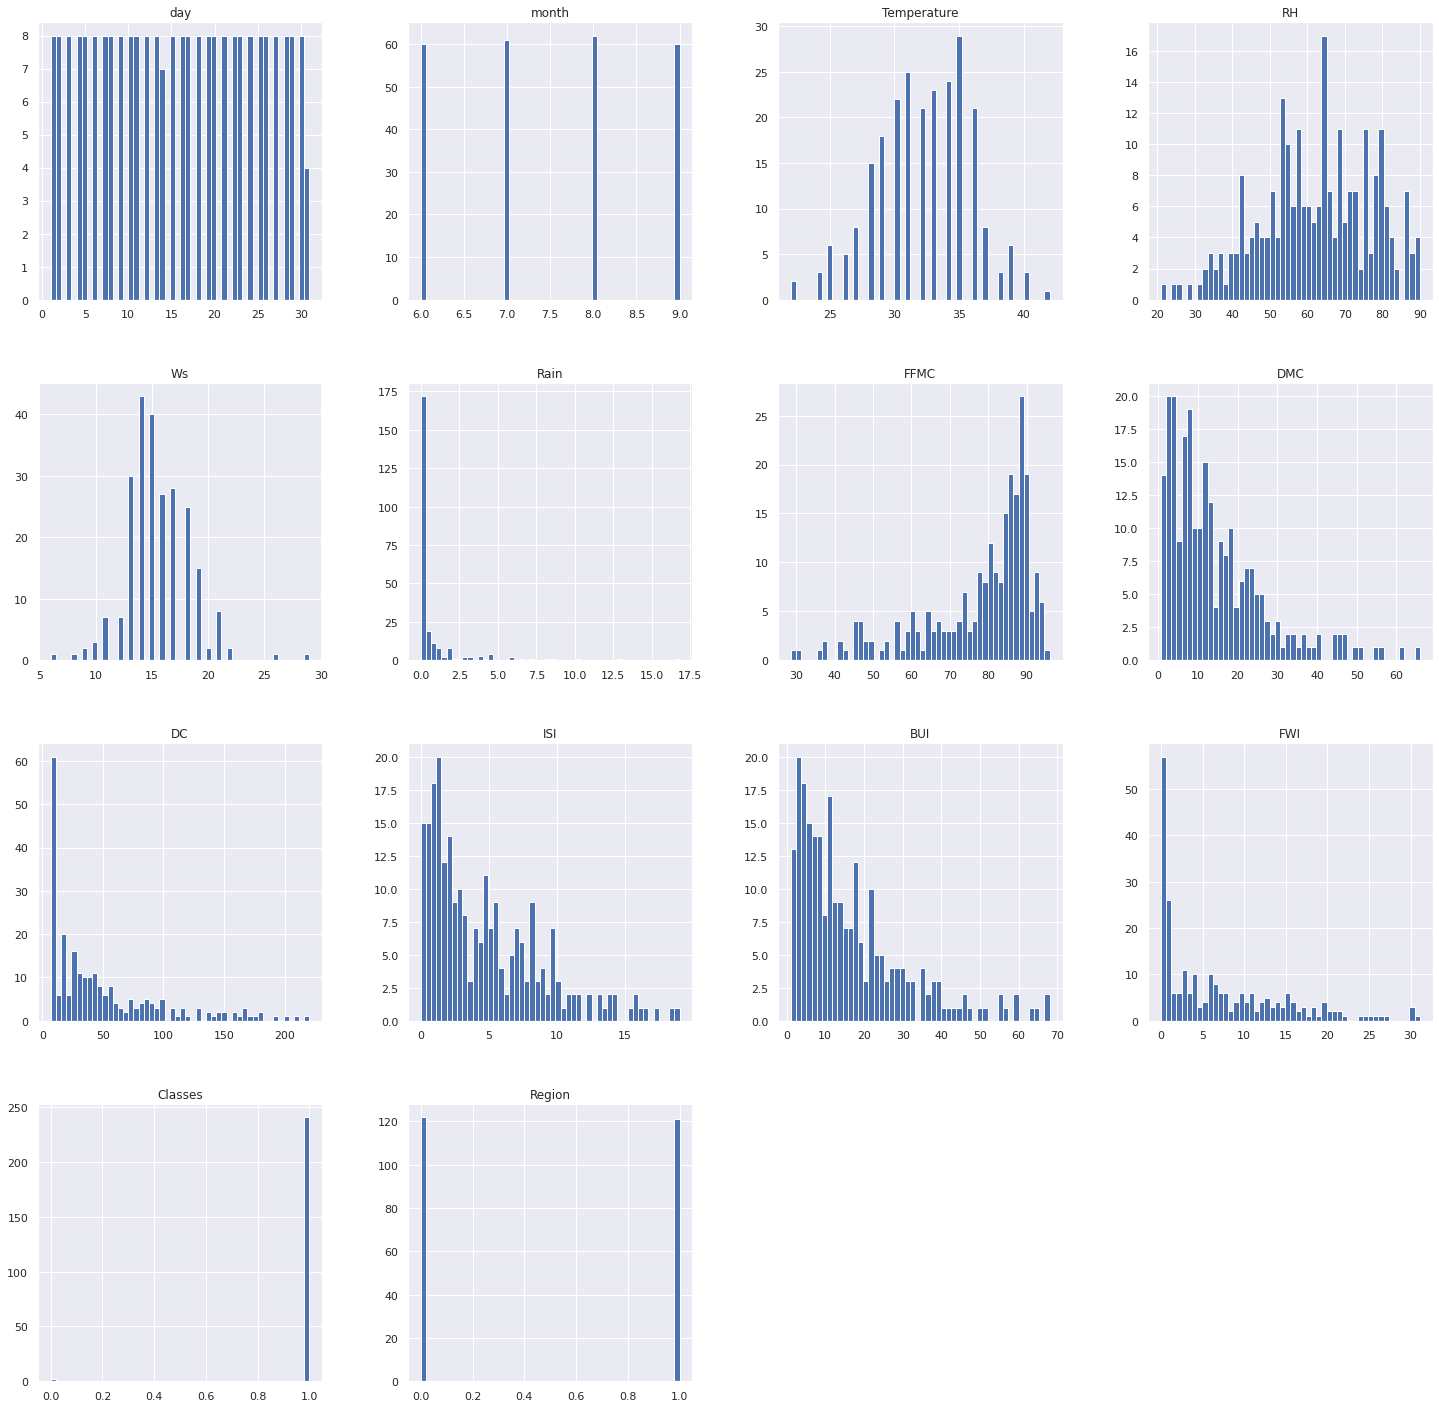

In [ ]:
#plot features as histograms 
df.hist(bins=50, figsize=(25,25))
plt.show()


# **Model Building using logistic Regression** 

In [ ]:
df.describe()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.991770,0.497942
std,8.842552,1.114793,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.090534,0.501028
min,1.000000,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,1.000000,0.000000
50%,16.000000,8.000000,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,23.000000,8.000000,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,31.000000,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [ ]:
#Split Features / Labels 
X = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC','ISI', 'BUI', 'FWI','Region']]
y = df['Classes']

In [ ]:
#split data into train and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=32,test_size=.33)

In [ ]:
#Feature Scaling 
def Feature_Scaling(X_train, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

X_train, X_test = Feature_Scaling(X_train, X_test)

In [ ]:
#apply logistic regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logistic_regression.predict(X_test)

# **Evaluation**

In [ ]:
#accuracy :
accuracy  = accuracy_score(y_test, y_pred)
accuracy

0.9876543209876543

In [ ]:
#Recall
recall = recall_score(y_test, y_pred, average=None)
recall

array([1.    , 0.9875])

In [ ]:
#precision
precision = precision_score(y_test, y_pred)
precision

1.0

In [ ]:
#f1_score
f1 = f1_score(y_test, y_pred)
f1

0.9937106918238994

In [ ]:
#specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
specificity

1.0

In [ ]:
#AUC 
auc = metrics.roc_auc_score(y_test, y_pred)
auc

0.99375

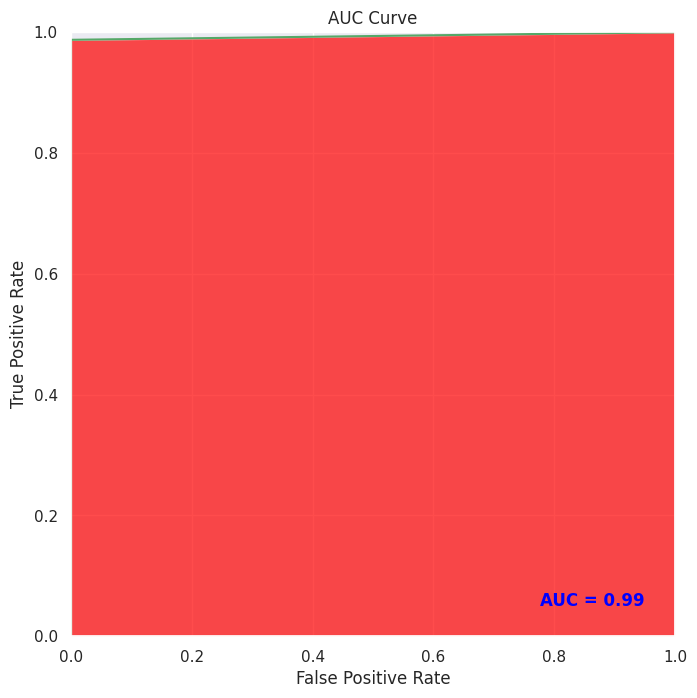

In [ ]:
#plot AUC
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='red', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
#ROC
roc = roc_curve(y_test, y_pred)
roc

(array([0., 0., 1.]), array([0.    , 0.9875, 1.    ]), array([2, 1, 0]))

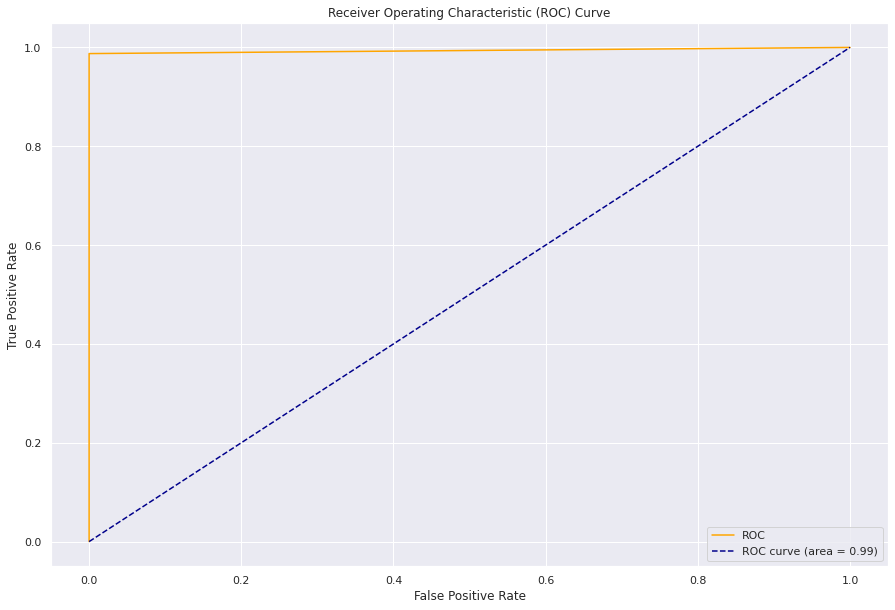

In [ ]:
#plot ROC
plt.plot(false_positive_rate, true_positive_rate, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()